# **Crimes in Chicago**

![image.png](attachment:image.png)

## **Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/Data Analytics Intern/rimes-in-chicago/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
data_2 = pd.read_csv('/content/drive/MyDrive/Data Analytics Intern/rimes-in-chicago/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'


In [ ]:
data_1.shape,data_2.shape

((1923515, 23), (1872343, 23))

In [ ]:
chicago_data = pd.concat([data_1,data_2])

In [ ]:
chicago_data.shape

(3795858, 23)

In [ ]:
chicago_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


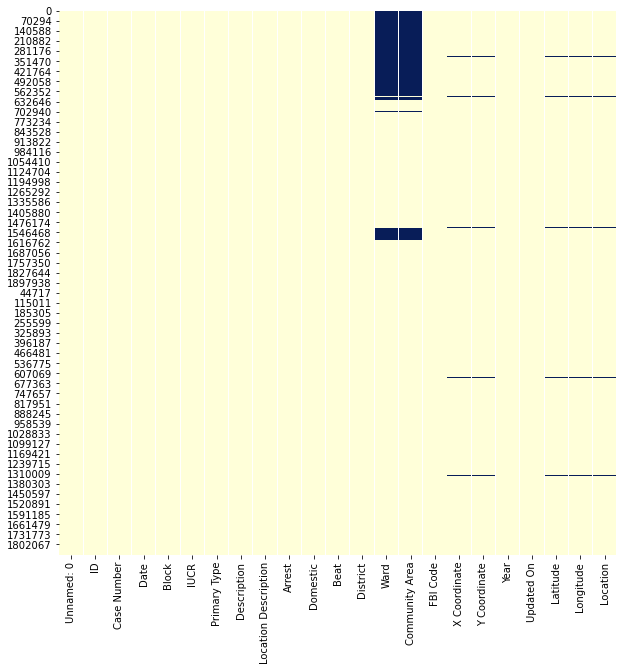

In [ ]:
#Let's check for the null values
plt.figure(figsize=(10,10))
sns.heatmap(chicago_data.isnull(),cbar=False,cmap='YlGnBu')
plt.show()

In [ ]:
chicago_data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
#Drop the columns that we are not going to use from the dataset
chicago_data.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate', 'Y Coordinate','Updated On', 'Latitude',
       'Longitude','Location','FBI Code','Ward','Year','Community Area','District','Beat'],axis=1,inplace=True)

In [ ]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


Check the data type for each column and convert date into datetime

In [ ]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795858 entries, 0 to 1872342
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Block                 object
 2   Primary Type          object
 3   Description           object
 4   Location Description  object
 5   Arrest                bool  
 6   Domestic              bool  
dtypes: bool(2), object(5)
memory usage: 181.0+ MB


In [ ]:
chicago_data['Date'] = pd.to_datetime(chicago_data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795858 entries, 0 to 1872342
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Block                 object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), object(4)
memory usage: 181.0+ MB


In [ ]:
chicago_data.Date.head()

0   2004-01-01 00:01:00
1   2003-03-01 00:00:00
2   2004-06-20 11:00:00
3   2004-12-30 20:00:00
4   2003-05-01 01:00:00
Name: Date, dtype: datetime64[ns]

In [ ]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [ ]:
chicago_data['Primary Type'].value_counts()

THEFT                               752950
BATTERY                             705101
CRIMINAL DAMAGE                     451606
NARCOTICS                           449114
OTHER OFFENSE                       238094
ASSAULT                             232143
BURGLARY                            205380
MOTOR VEHICLE THEFT                 185938
ROBBERY                             136906
CRIMINAL TRESPASS                   119556
DECEPTIVE PRACTICE                  112954
PROSTITUTION                         53568
WEAPONS VIOLATION                    33112
PUBLIC PEACE VIOLATION               23191
OFFENSE INVOLVING CHILDREN           22886
SEX OFFENSE                          15280
CRIM SEXUAL ASSAULT                  13328
LIQUOR LAW VIOLATION                 10201
GAMBLING                              9647
ARSON                                 6843
INTERFERENCE WITH PUBLIC OFFICER      4637
HOMICIDE                              4554
KIDNAPPING                            4484
INTIMIDATIO

Let's print top 15 crimes

In [ ]:
order_data = chicago_data['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

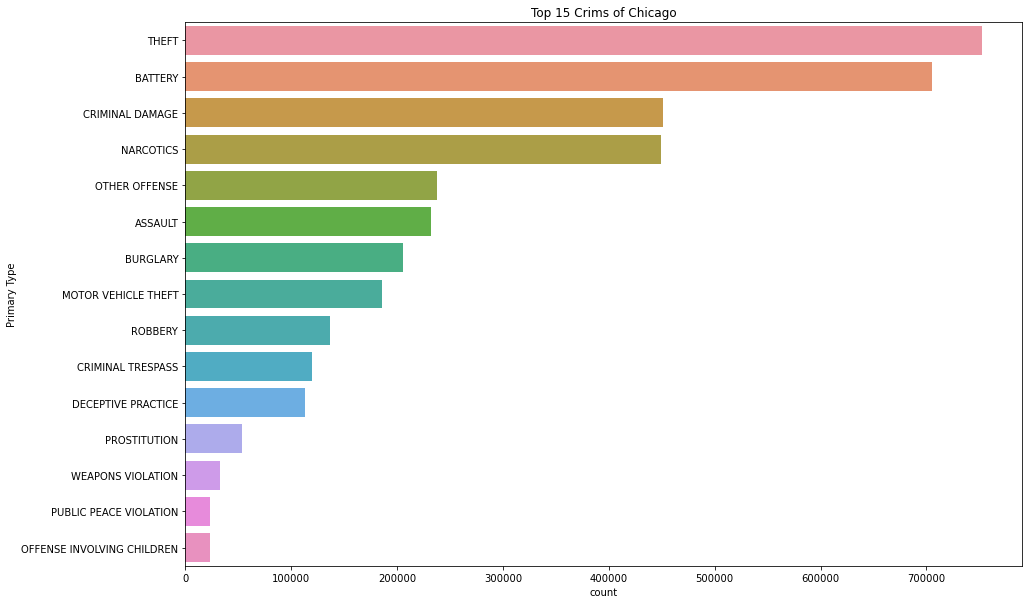

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_data,order=order_data)
plt.title('Top 15 Crims of Chicago')
plt.show()

In [ ]:
order_for_location = chicago_data['Location Description'].value_counts().iloc[:15].index
order_for_location

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'SCHOOL, PUBLIC, BUILDING', 'ALLEY',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'VEHICLE NON-COMMERCIAL',
       'SMALL RETAIL STORE', 'GROCERY FOOD STORE', 'RESTAURANT',
       'CHA PARKING LOT/GROUNDS'],
      dtype='object')

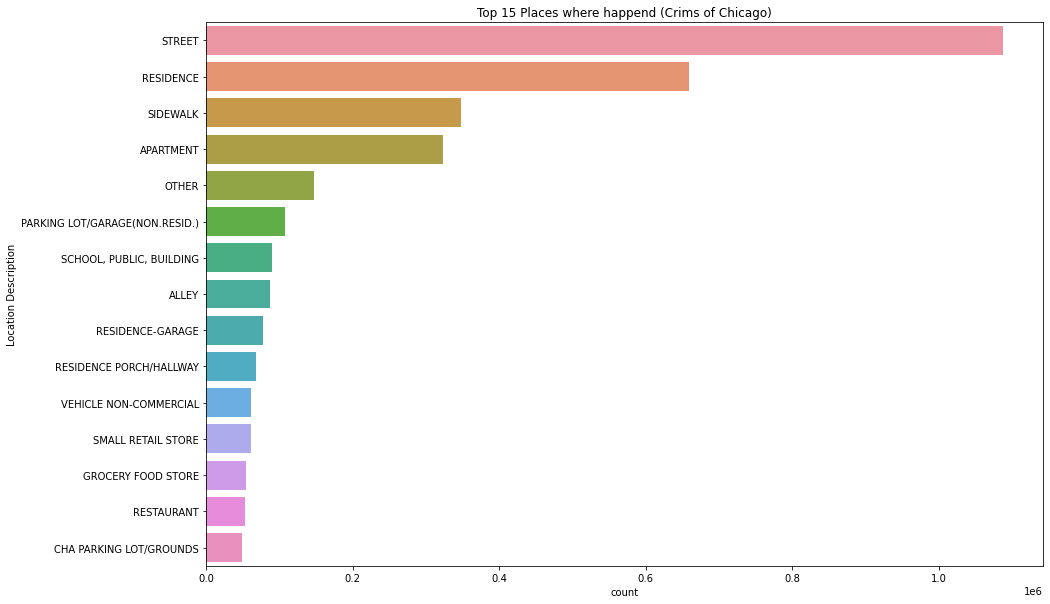

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=chicago_data,order=order_for_location)
plt.title('Top 15 Places where happend (Crims of Chicago)')
plt.show()

In [ ]:
chicago_data.set_index('Date',inplace=True)

In [ ]:
chicago_data.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


Find the crime rate per year

In [ ]:
temp = chicago_data.resample('Y').size()
temp

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
Freq: A-DEC, dtype: int64

Let's plot this in graph

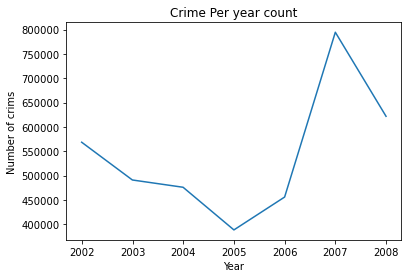

In [ ]:
plt.plot(temp)
plt.title('Crime Per year count')
plt.xlabel('Year')
plt.ylabel('Number of crims')
plt.show()

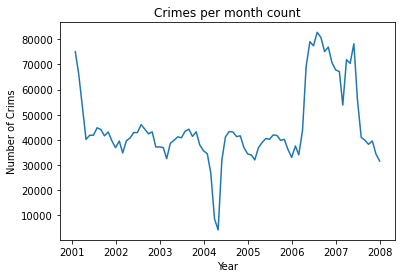

In [ ]:
plt.plot(chicago_data.resample('M').size())
plt.title('Crimes per month count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

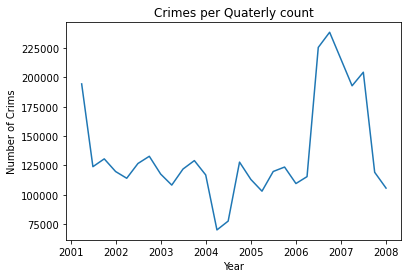

In [ ]:
plt.plot(chicago_data.resample('Q').size())
plt.title('Crimes per Quaterly count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

In [ ]:
chicago_prohet = chicago_data.resample('M').size().reset_index()
chicago_prohet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
79,2007-08-31,39844
80,2007-09-30,38252
81,2007-10-31,39586
82,2007-11-30,34418


In [ ]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

,Date,CrimeCount
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
79,2007-08-31,39844
80,2007-09-30,38252
81,2007-10-31,39586
82,2007-11-30,34418


In [ ]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
79,2007-08-31,39844
80,2007-09-30,38252
81,2007-10-31,39586
82,2007-11-30,34418


In [ ]:
m = Prophet()
m.fit(chicago_prohet_data)

# **Make a Predicition**

**Let's check crime rate in next one year**

In [ ]:
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,35580.190555,29638.460615,65383.213515,35580.190555,35580.190555,11935.666379,11935.666379,11935.666379,11935.666379,11935.666379,11935.666379,0.0,0.0,0.0,47515.856934
1,2001-02-28,35748.398808,17864.273256,53167.063824,35748.398808,35748.398808,126.102710,126.102710,126.102710,126.102710,126.102710,126.102710,0.0,0.0,0.0,35874.501518
2,2001-03-31,35934.629375,14538.940818,48748.223154,35934.629375,35934.629375,-3528.654657,-3528.654657,-3528.654657,-3528.654657,-3528.654657,-3528.654657,0.0,0.0,0.0,32405.974718
3,2001-04-30,36114.852504,16355.497999,50389.065148,36114.852504,36114.852504,-3331.078429,-3331.078429,-3331.078429,-3331.078429,-3331.078429,-3331.078429,0.0,0.0,0.0,32783.774075
4,2001-05-31,36301.083073,27087.641687,63011.614191,36301.083073,36301.083073,7238.720568,7238.720568,7238.720568,7238.720568,7238.720568,7238.720568,0.0,0.0,0.0,43539.803641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2008-12-26,53085.001917,30328.147844,65567.634999,53082.221538,53087.366533,-5731.177184,-5731.177184,-5731.177184,-5731.177184,-5731.177184,-5731.177184,0.0,0.0,0.0,47353.824733
445,2008-12-27,53091.106712,35686.287725,69939.147719,53088.312933,53093.481319,-1057.811783,-1057.811783,-1057.811783,-1057.811783,-1057.811783,-1057.811783,0.0,0.0,0.0,52033.294929
446,2008-12-28,53097.211507,35972.990779,71357.542691,53094.404828,53099.596104,1284.171396,1284.171396,1284.171396,1284.171396,1284.171396,1284.171396,0.0,0.0,0.0,54381.382903
447,2008-12-29,53103.316302,35572.881249,71776.775008,53100.506812,53105.710890,1097.573248,1097.573248,1097.573248,1097.573248,1097.573248,1097.573248,0.0,0.0,0.0,54200.889550


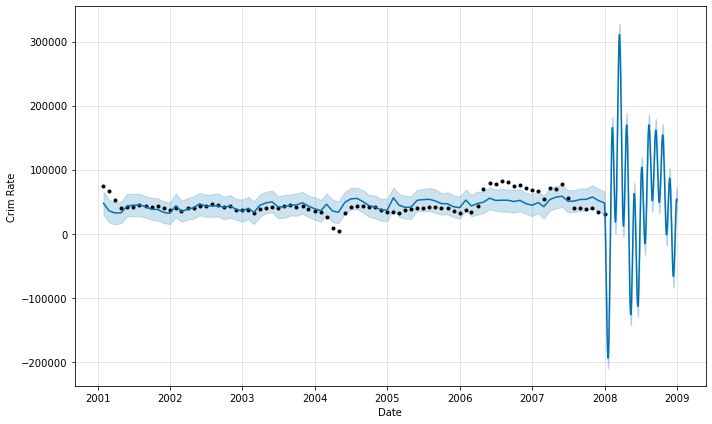

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

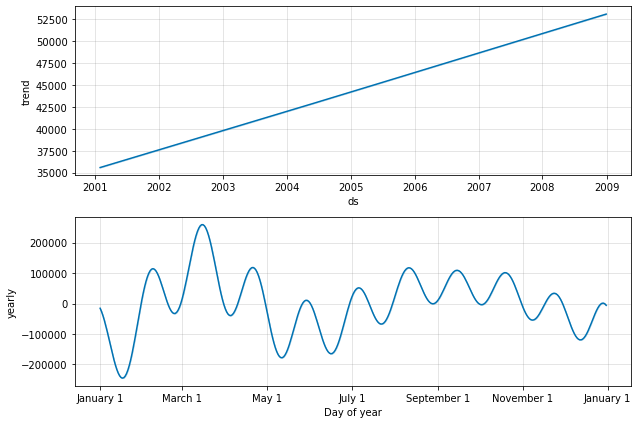

In [ ]:
figure = m.plot_components(forcast)

In [ ]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,35580.190555,30411.432580,64117.761453,35580.190555,35580.190555,11935.666379,11935.666379,11935.666379,11935.666379,11935.666379,11935.666379,0.0,0.0,0.0,47515.856934
1,2001-02-28,35748.398808,18451.722780,53286.103744,35748.398808,35748.398808,126.102710,126.102710,126.102710,126.102710,126.102710,126.102710,0.0,0.0,0.0,35874.501518
2,2001-03-31,35934.629375,16361.469586,49508.080063,35934.629375,35934.629375,-3528.654657,-3528.654657,-3528.654657,-3528.654657,-3528.654657,-3528.654657,0.0,0.0,0.0,32405.974718
3,2001-04-30,36114.852504,15524.086216,49930.455953,36114.852504,36114.852504,-3331.078429,-3331.078429,-3331.078429,-3331.078429,-3331.078429,-3331.078429,0.0,0.0,0.0,32783.774075
4,2001-05-31,36301.083073,25147.810950,60657.494455,36301.083073,36301.083073,7238.720568,7238.720568,7238.720568,7238.720568,7238.720568,7238.720568,0.0,0.0,0.0,43539.803641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2009-12-16,55252.204187,-68997.651971,-33226.299700,55244.437625,55259.599579,-106616.111923,-106616.111923,-106616.111923,-106616.111923,-106616.111923,-106616.111923,0.0,0.0,0.0,-51363.907737
800,2009-12-17,55258.308982,-59854.565196,-26137.702200,55250.530397,55265.726591,-98728.546633,-98728.546633,-98728.546633,-98728.546633,-98728.546633,-98728.546633,0.0,0.0,0.0,-43470.237651
801,2009-12-18,55264.413777,-51865.936370,-16034.594835,55256.623170,55271.853604,-89392.180220,-89392.180220,-89392.180220,-89392.180220,-89392.180220,-89392.180220,0.0,0.0,0.0,-34127.766443
802,2009-12-19,55270.518572,-40849.432591,-5708.452703,55262.715943,55277.980616,-78929.038018,-78929.038018,-78929.038018,-78929.038018,-78929.038018,-78929.038018,0.0,0.0,0.0,-23658.519445


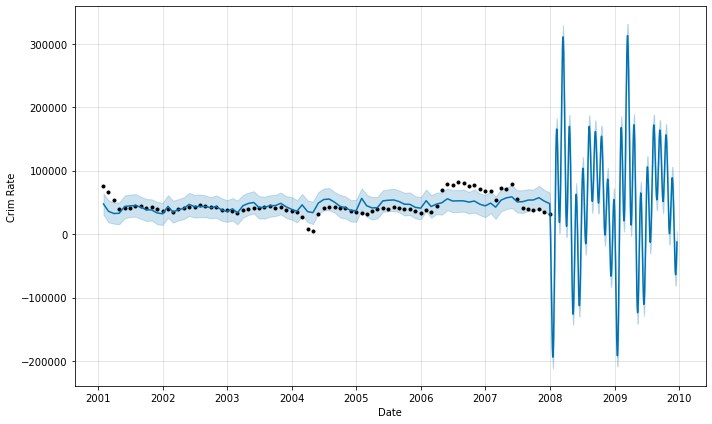

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

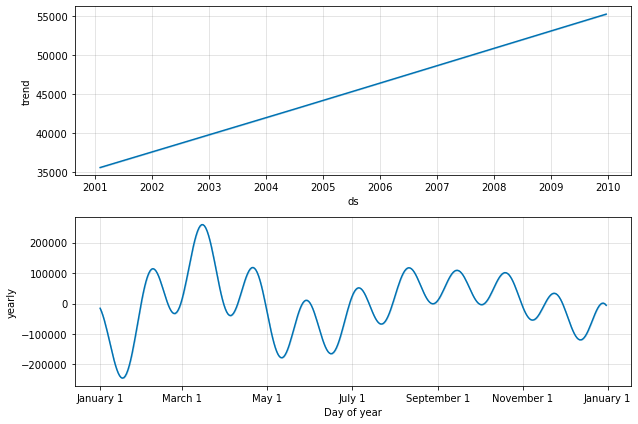

In [ ]:
figure = m.plot_components(forcast)